<a href="https://colab.research.google.com/github/sispo3314/AI_study/blob/main/HAR/rs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from datetime import datetime
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [48]:
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [49]:
train=pd.read_csv('/content/drive/MyDrive/src/data/train.csv', encoding='utf-8-sig')
test=pd.read_csv('/content/drive/MyDrive/src/data/test.csv', encoding='utf-8-sig')

In [50]:
X_train=train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train=train.ActivityName

X_test=test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test=test.ActivityName

print("X_train and y_train:({},{})".format(X_train.shape, y_train.shape))
print("X_test and y_test:({},{})".format(X_test.shape, y_test.shape))

X_train and y_train:((7352, 561),(7352,))
X_test and y_test:((2947, 561),(2947,))


In [51]:
labels=['LAYING', 'SITTING', "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

In [52]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)

  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color='white' if cm[i, j]>thresh else "black")


In [53]:
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                  print_cm=True, cm_cmap=plt.cm.Greens):
  results=dict()

  train_start_time=datetime.now() #훈련 시작 시간
  print("training the model...")
  model.fit(X_train, y_train)
  print('Done \n \n')
  train_end_time=datetime.now() #훈련 종료 시간
  results['training_time']=train_end_time-train_start_time
  print('training_time(HH:MM:SS.ms)-{}\n\n'.format(results['training_time']))

  print("Predicting test data")
  test_start_time=datetime.now()
  y_pred=model.predict(X_test)
  test_end_time=datetime.now()
  print('Done \n\n')
  results['testing_time'] = test_end_time - test_start_time
  print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
  results['predicted']=y_pred

  accuracy=metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
  results['accuracy']=accuracy
  print('----------------------')
  print('|      Accuracy       |')
  print('----------------------')
  print('\n     {}\n\n'.format(accuracy))

  #혼돈 행렬
  cm=metrics.confusion_matrix(y_test, y_pred)
  results['confusion_matrix']=cm
  results['confusion_matrix'] = cm
  if print_cm:
      print('--------------------')
      print('| Confusion Matrix |')
      print('--------------------')
      print('\n {}'.format(cm))

  plt.figure(figsize=(8,8))
  plt.grid(False)
  plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
  plt.show()

  print('=========================')
  print('| Classification Report |')
  print('=========================')

  classification_report=metrics.classification_report(y_test, y_pred)
  results['classification_report']=classification_report
  print(classification_report)

  results['models']=model
  return results

In [54]:
def print_grid_search_attributes(model):
    print('------------------------')
    print('|     Best Estimator    |')
    print('------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))

    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    print('--------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))

    print('------------------------')
    print('|       Best Score     |')
    print('------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

training the model...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done 
 

training_time(HH:MM:SS.ms)-0:00:40.569944


Predicting test data
Done 


testing time(HH:MM:SS:ms) - 0:00:00.032209


----------------------
|      Accuracy       |
----------------------

     0.9586019681031558


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 405  11]
 [  0   0   0  27   1 443]]


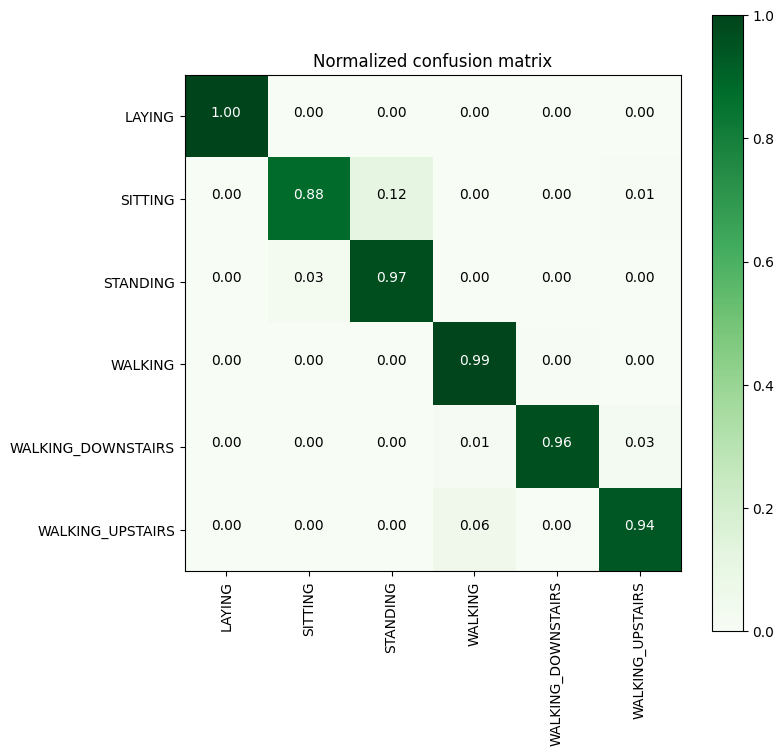

| Classification Report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
  WALKING_UPSTAIRS       0.97      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [55]:
#그리드 서치
parameters={'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2', 'l1']}
log_reg=linear_model.LogisticRegression()
log_reg_grid=GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results=perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


training the model...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done 
 

training_time(HH:MM:SS.ms)-0:01:27.842011


Predicting test data
Done 


testing time(HH:MM:SS:ms) - 0:00:00.015018


----------------------
|      Accuracy       |
----------------------

     0.9664065151001018


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 411   6]
 [  0   0   0  17   0 454]]


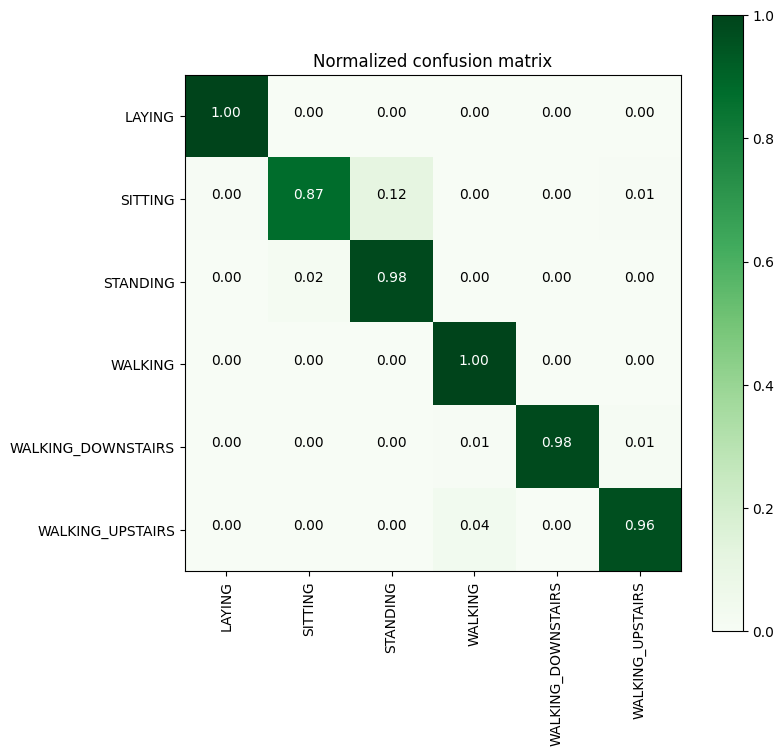

| Classification Report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947

------------------------
|     Best Estimator    |
------------------------

	LinearSVC(C=0.5, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

--------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation

In [57]:
parameters={'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc=LinearSVC(tol=0.00005)
lr_svc_grid=GridSearchCV(lr_svc, param_grid=parameters, n_jobs=8, verbose=1)
lr_svc_grid_results=perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(lr_svc_grid_results['models'])

training the model...
Done 
 

training_time(HH:MM:SS.ms)-0:12:05.145699


Predicting test data
Done 


testing time(HH:MM:SS:ms) - 0:00:01.926613


----------------------
|      Accuracy       |
----------------------

     0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


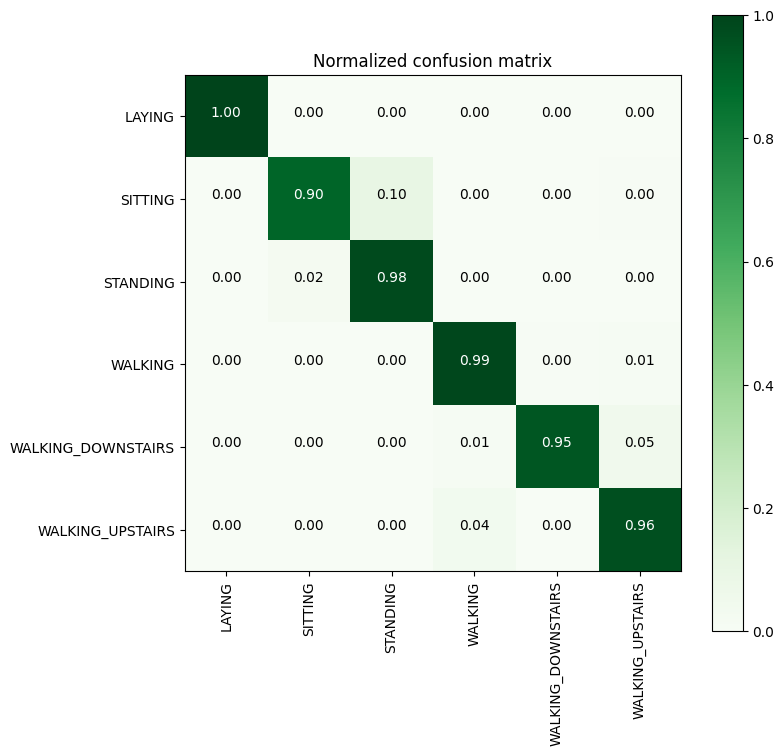

| Classification Report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

------------------------
|     Best Estimator    |
------------------------

	SVC(C=16, gamma=0.0078125)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

--------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre o

In [64]:
parameters = {'C':[2,8,16], 'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rbf_svm_grid_results['models'])

training the model...
Done 
 

training_time(HH:MM:SS.ms)-0:01:14.703483


Predicting test data
Done 


testing time(HH:MM:SS:ms) - 0:00:00.022683


----------------------
|      Accuracy       |
----------------------

     0.8642687478791992


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 385 106   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 471  17   8]
 [  0   0   0  13 346  61]
 [  0   0   0  78  24 369]]


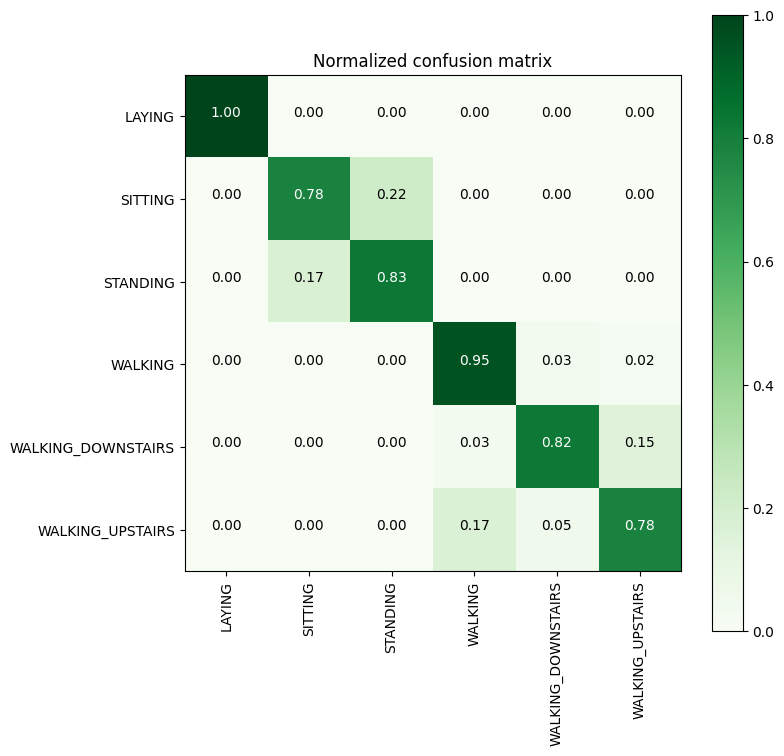

| Classification Report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.78      0.79       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.89      0.82      0.86       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947

------------------------
|     Best Estimator    |
------------------------

	DecisionTreeClassifier(max_depth=np.int64(7))

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': np.int64(7)}

--------------------------------
|   No of CrossValidation sets   |
--------------------------------


In [59]:
#결정 트리
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=8)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['models'])

training the model...
Done 
 

training_time(HH:MM:SS.ms)-0:45:59.991383


Predicting test data
Done 


testing time(HH:MM:SS:ms) - 0:00:00.082816


----------------------
|      Accuracy       |
----------------------

     0.9216152019002375


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 428  63   0   0   0]
 [  0  46 486   0   0   0]
 [  0   0   0 484   9   3]
 [  0   0   0  23 351  46]
 [  0   0   0  35   6 430]]


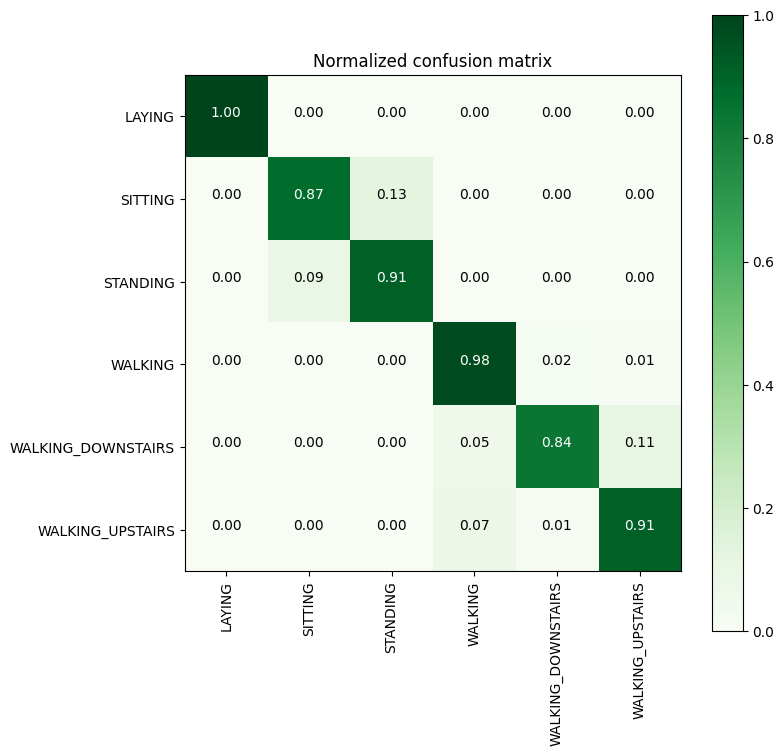

| Classification Report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.87      0.89       491
          STANDING       0.89      0.91      0.90       532
           WALKING       0.89      0.98      0.93       496
WALKING_DOWNSTAIRS       0.96      0.84      0.89       420
  WALKING_UPSTAIRS       0.90      0.91      0.91       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

------------------------
|     Best Estimator    |
------------------------

	RandomForestClassifier(max_depth=np.int64(11), n_estimators=np.int64(110))

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': np.int64(11), 'n_estimators': np.int64(110)}

--------------------------------
|   No 

In [60]:
#랜덤 포레스트
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=8)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['models'])

In [ ]:
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=8)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['models'])

training the model...
